In [3]:
import os
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
suicide_csv = "../csvs/suicide.csv"
hdi_csv = "../csvs/hdi.csv"
country_continent_csv = "../csvs/countryContinent.csv"

In [5]:
#Lendo csv.
suicide_df = pd.read_csv(suicide_csv)
hdi_df = pd.read_csv(hdi_csv, sep=";")
country_continent_df = pd.read_csv(country_continent_csv)

In [6]:
#Fazendo cópias do Dataframe para trabalhar com as cópias.
suicide = suicide_df.copy()
hdi = hdi_df.copy()
country_continent = country_continent_df.copy()

In [7]:
#Fazendo drop em colunas que não serão ultilizadas.
suicide.drop("HDI for year", axis=1, inplace=True)
suicide.drop("country-year", axis=1, inplace=True)
suicide.drop("generation", axis=1, inplace=True)
country_continent.drop("code_2", axis=1, inplace=True)
country_continent.drop("code_3", axis=1, inplace=True)
country_continent.drop("country_code", axis=1, inplace=True)
country_continent.drop("iso_3166_2", axis=1, inplace=True)
country_continent.drop("region_code", axis=1, inplace=True)
country_continent.drop("sub_region_code", axis=1, inplace=True)

In [8]:
#Junatando suicidio com continentes, para obter os nomes dos continentes e sub-regiões.
countries = pd.merge(suicide,country_continent,on=["country"], how="inner")

In [9]:
#Juntando continentes(gerado no merge anterior) com o idh, para obter a coluna de idh.
result = pd.merge(countries,hdi, on=["country","year"], how="inner")

In [10]:
#Pegando os países por suas sub-regiões.
australia_newzeland = result[(result["sub_region"] == "Australia and New Zealand")]
caribbean = result[(result["sub_region"] == "Caribbean")]
central_america = result[(result["sub_region"] == "Central America")]
central_asia = result[(result["sub_region"] == "Central Asia")]
eastern_africa = result[(result["sub_region"] == "Eastern Africa")]
eastern_asia = result[(result["sub_region"] == "Eastern Asia")]
eastern_europe = result[(result["sub_region"] == "Eastern Europa")]
melanesia = result[(result["sub_region"] == "Melanesia")]
micronesia = result[(result["sub_region"] == "Micronesia")]
northern_america = result[(result["sub_region"] == "Northern America")]
northern_europe = result[(result["sub_region"] == "Northern Europe")]
south_america = result[(result["sub_region"] == "South America")]
south_eastern_asia = result[(result["sub_region"] == "South-Eastern Asia")]
southern_africa = result[(result["sub_region"] == "Southern Africa")]
southern_asia = result[(result["sub_region"] == "Southern Asia")]
southern_europe = result[(result["sub_region"] == "Southern Europe")]
western_africa = result[(result["sub_region"] == "Western Africa")]
western_asia = result[(result["sub_region"] == "Western Asia")]
western_europe = result[(result["sub_region"] == "Western Europe")]

In [11]:
#Pegando os países por continentes
africa = result[(result["continent"] == "Africa")]
americas = result[(result["continent"] == "Americas")]
asia = result[(result["continent"] == "Asia")]
europe = result[(result["continent"] == "Europe")]
Oceania = result[(result["continent"] == "Oceania")]

In [12]:
south_eastern_asia.head()

,country,year,sex,age,suicides_no,population,suicides/100kpop,gdp-year,gdp-per-capita,continent,sub_region,hdi
10416,Philippines,2000,male,75+ years,20,299136,6.69,"81,026,300,311",1205,Asia,South-Eastern Asia,0.624
10417,Philippines,2000,male,55-74 years,121,2370016,5.11,"81,026,300,311",1205,Asia,South-Eastern Asia,0.624
10418,Philippines,2000,male,25-34 years,276,5947283,4.64,"81,026,300,311",1205,Asia,South-Eastern Asia,0.624
10419,Philippines,2000,male,15-24 years,316,7859202,4.02,"81,026,300,311",1205,Asia,South-Eastern Asia,0.624
10420,Philippines,2000,male,35-54 years,294,7449254,3.95,"81,026,300,311",1205,Asia,South-Eastern Asia,0.624


TypeError: <lambda>() missing 1 required positional argument: 'height'

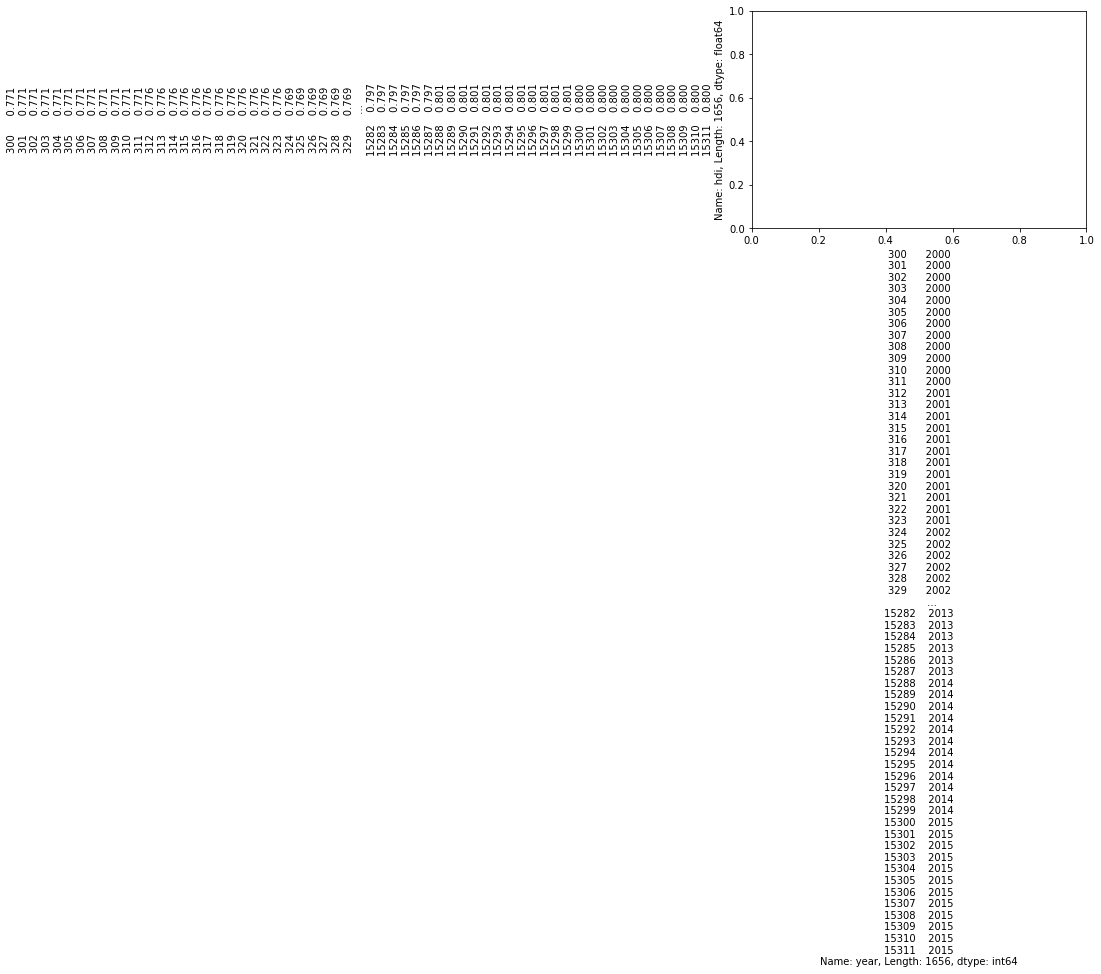

In [13]:
plt.xlabel(south_america["year"])
plt.ylabel(south_america["hdi"])
plt.bar(south_america["country"])